In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
j13 = pd.read_csv("journal13.csv")
j14 = pd.read_csv("journal14.csv")

In [3]:
#j13 = pd.read_excel("ABC 2013 JEs.xlsx")

In [6]:
j13.head()

,JE number,JE line number,GL account code,Fiscal year,Fiscal period,Effective date,Entry date,Source code,Source,Source group,Functional amount,Functional currency code,Business unit code,Business unit,Preparer ID,Preparer department,JE line description,Approver ID,Reversal Indicator
0,2013-0001-0210000003,1,60000001,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,-84700.00,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N
1,2013-0001-0210000003,2,60000113,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,70000.00,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N
2,2013-0001-0210000003,3,20001102,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,14700.00,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N
3,2013-0001-0210000006,1,60000001,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,-3274.26,EUR,1,ABC Company,SYS,System,JE Line Description1,EY EMPTY,N
4,2013-0001-0210000006,2,60000112,2013,1,2013-01-18,2013-01-21,FP,FP-Invoice promotion,Purchases,2706.00,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N


In [4]:
#j14 = pd.read_excel("ABC 2014 JEs.xlsx")

In [9]:
j14.head()

,JE number,JE line number,GL account code,Fiscal year,Fiscal period,Effective date,Entry date,Source code,Source,Source group,Functional amount,Functional currency code,Business unit code,Business unit,Preparer ID,Preparer department,JE line description,Approver ID,Reversal Indicator
0,2014-0001-0210000003,1,60000001,2014,1,2014-01-22,2014-01-22,FP,FP-Invoice promotion,Purchases,-148808.80,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N
1,2014-0001-0210000003,2,60000112,2014,1,2014-01-22,2014-01-22,FP,FP-Invoice promotion,Purchases,4488.22,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N
2,2014-0001-0210000003,3,60000112,2014,1,2014-01-22,2014-01-22,FP,FP-Invoice promotion,Purchases,5280.28,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N
3,2014-0001-0210000003,4,60000112,2014,1,2014-01-22,2014-01-22,FP,FP-Invoice promotion,Purchases,102437.40,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N
4,2014-0001-0210000003,5,60000112,2014,1,2014-01-22,2014-01-22,FP,FP-Invoice promotion,Purchases,4488.24,EUR,1,ABC Company,SYS,System,NaN,EY EMPTY,N


**2013 sowie 2014 sind die Abweichungen der Summen von 0 bei den jeweiligen Journalnummern vernachlässigbar:**

In [11]:
sums13 = j13.groupby("JE number").aggregate({"Functional amount": sum})

In [19]:
sums13 = j13.groupby("JE number").aggregate({"Functional amount": sum})
all(np.abs(sums13["Functional amount"]) < 1e-7)

True

In [20]:
sums14 = j14.groupby("JE number").aggregate({"Functional amount": sum})
all(np.abs(sums14["Functional amount"]) < 1e-7)

True

**Wochentage**

Effective date= Buchungsdatum  

Entry date= Belegdatum

In [5]:
j13['DOW_entry_date'] = j13["Entry date"].dt.dayofweek
j13['DOW_effective_date'] = j13["Effective date"].dt.dayofweek

In [6]:
j14['DOW_entry_date'] = j14["Entry date"].dt.dayofweek
j14['DOW_effective_date'] = j14["Effective date"].dt.dayofweek

**Folgende Variablen beinhalten keine Informationen:**

Functional currency code         
Business unit code               
Business unit                    
Approver ID

In [5]:
j13.apply('nunique')

JE number                   110285
JE line number                 634
GL account code                475
Fiscal year                      1
Fiscal period                   12
Effective date                 364
Entry date                     384
Source code                     74
Source                          74
Source group                    14
Functional amount           177204
Functional currency code         1
Business unit code               1
Business unit                    1
Preparer ID                     42
Preparer department              7
JE line description            264
Approver ID                      1
Reversal Indicator               2
dtype: int64

In [8]:
j14.apply('nunique')

JE number                    98823
JE line number                 246
GL account code                476
Fiscal year                      1
Fiscal period                   12
Effective date                 363
Entry date                     386
Source code                     78
Source                          78
Source group                    15
Functional amount           176453
Functional currency code         1
Business unit code               1
Business unit                    1
Preparer ID                     48
Preparer department              9
JE line description            264
Approver ID                      1
Reversal Indicator               2
DOW_entry_date                   7
DOW_effective_date               7
dtype: int64

In [9]:
# j13.to_csv("journal13.csv")
# j14.to_csv("journal14.csv")

In [20]:
df = pd.concat([j13, j14])

In [24]:
df.drop(["Functional currency code", "Business unit code", "Business unit", "Approver ID"], axis=1, inplace=True)

**Es ist eine Aktivität an Sonntagen zu beobachten:**

In [80]:
dow_counts = df.groupby("Fiscal year").aggregate({"DOW_entry_date": "value_counts", "DOW_effective_date": "value_counts"})
dow_counts.index.set_levels([[2013, 2014], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']], inplace=True)

In [81]:
dow_counts

DOW_entry_date  DOW_effective_date
2013 Mon           74786               70403
     Tue           79237               77552
     Wed           75452               73589
     Thu           79136               76101
     Fri           67883               70014
     Sat            5638               10752
     Sun            1876                5597
2014 Mon           65311               62390
     Tue           71881               68085
     Wed           70266               68936
     Thu           69892               64150
     Fri           66239               74523
     Sat            5348                6846
     Sun            1678                5685

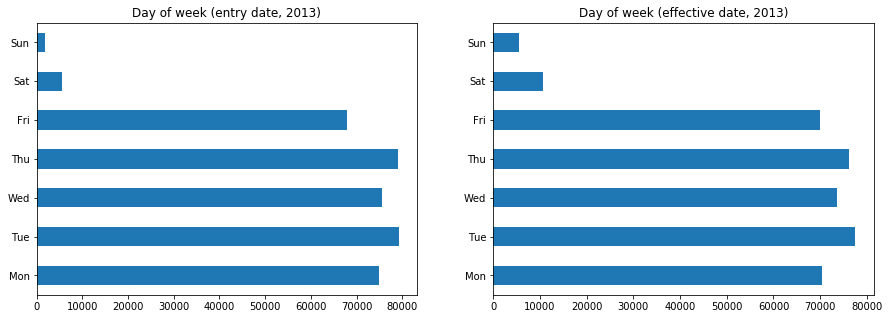

In [82]:
f, axes = plt.subplots(1, 2, figsize=(15, 5))
dow_counts.loc[2013, "DOW_entry_date"].plot("barh", title="Day of week (entry date, 2013)", ax=axes[0])
dow_counts.loc[2013, "DOW_effective_date"].plot("barh", title="Day of week (effective date, 2013)", ax=axes[1])

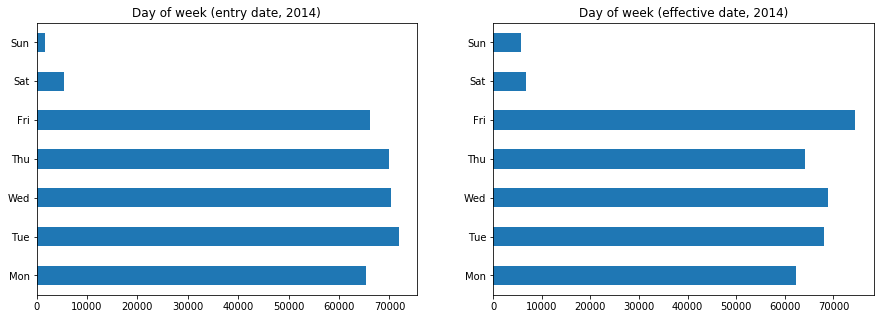

In [83]:
f, axes = plt.subplots(1, 2, figsize=(15, 5))
dow_counts.loc[2014, "DOW_entry_date"].plot("barh", title="Day of week (entry date, 2014)", ax=axes[0])
dow_counts.loc[2014, "DOW_effective_date"].plot("barh", title="Day of week (effective date, 2014)", ax=axes[1])

**Functional amount**

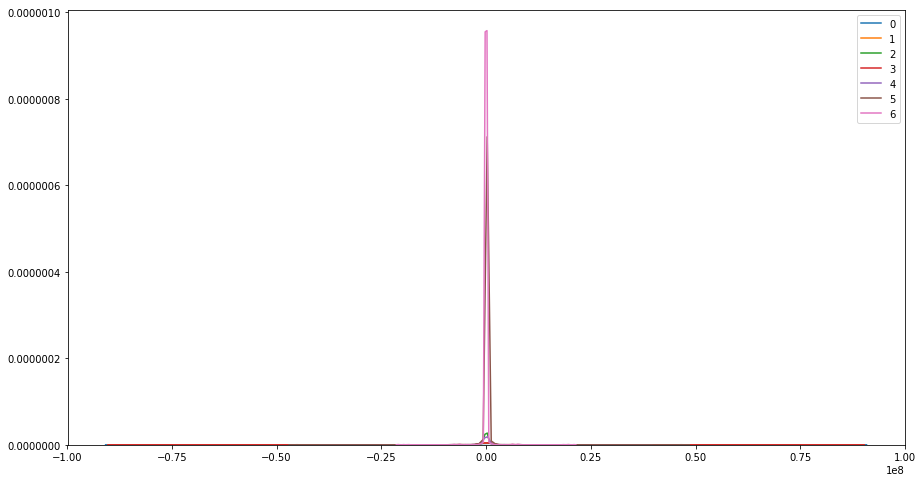

In [138]:
plt.figure(figsize=(15,8))
for day in sorted(j13.DOW_effective_date.unique()):
    data = j13.query("DOW_effective_date == @day")["Functional amount"]
    sns.kdeplot(data, label=day)
# wtf is happening with you, seaborn
# TODO: smth with y axis 

Text(0.5, 0.98, 'Functional amount distribution (day of week), 2013')

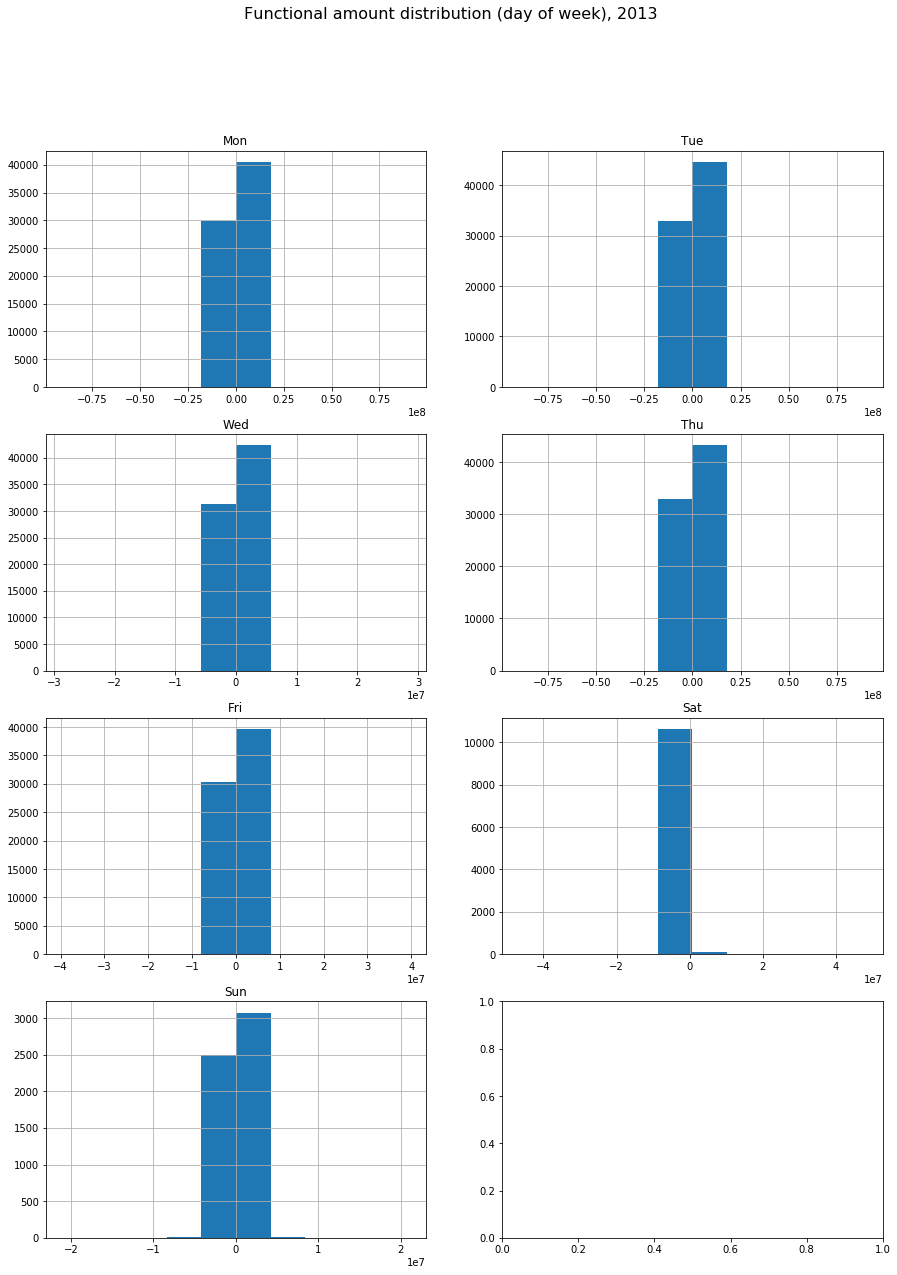

In [133]:
wdays = {0:"Mon", 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"}
f, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()
for day in sorted(j13.DOW_effective_date.unique()):
    data = j13.query("DOW_effective_date == @day")["Functional amount"]
    data.hist(bins=10, ax=axes[day]).set_title(wdays[day])
    #sns.kdeplot(data, label=day, ax=axes[i])
f.suptitle("Functional amount distribution (day of week), 2013", fontsize=16)